In [41]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [42]:
digits = load_digits()

In [43]:
digits.data.shape

(1797, 64)

In [44]:
x = digits.data
y = digits.target

In [53]:
x_tr = np.copy(x)
y_tr = np.copy(y)
np.random.shuffle([x_tr, y_tr])

9


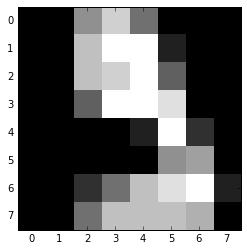

In [46]:
i = 29
img = x[i]
plt.imshow(img.reshape(8, 8), interpolation='Nearest', cmap='gray')
print(y_tr[i])

In [54]:
n_tr = int(y_tr.size * 0.8)
x_te = x_tr[n_tr:, :]
y_te = y_tr[n_tr:]
x_tr = x_tr[:n_tr, :]
y_tr = y_tr[:n_tr]

In [52]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_tr = scaler_x.fit_transform(x_tr)
x_te = scaler_x.transform(x_te)
y_tr_reg = scaler_y.fit_transform(y_tr)
y_te_reg = scaler_y.transform(y_te)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [26]:
# np.save('data_reg/x_tr.npy', x_tr)
# np.save('data_reg/x_te.npy', x_te)
# np.save('data_reg/y_tr.npy', y_tr_reg)
# np.save('data_reg/y_te.npy', y_te_reg)

In [29]:
# np.save('data_class/x_tr.npy', x_tr)
# np.save('data_class/x_te.npy', x_te)
# np.save('data_class/y_tr.npy', y_tr)
# np.save('data_class/y_te.npy', y_te)

## PCA vizualization

In [61]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

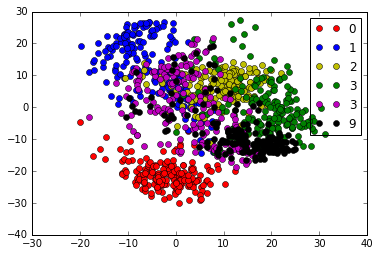

In [45]:
plt.clf()
zeros = x_2d[y == 0]
ones = x_2d[y == 1]
twos = x_2d[y == 2]
threes = x_2d[y == 3]
fives = x_2d[y == 5]
nines = x_2d[y == 9]

plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'bo', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'yo', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fives[:, 0], fives[:, 1], 'mo', label='3')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend()

3d for comparison

In [121]:
pca = PCA(n_components=3)
x_tr_3d = pca.fit_transform(x_tr)
x_te_3d = pca.transform(x_te)
np.save('../../data/temp/x_tr.npy', x_tr_3d)
np.save('../../data/temp/x_te.npy', x_te_3d)
np.save('../../data/temp/y_tr.npy', y_tr)
np.save('../../data/temp/y_te.npy', y_te)

## Vizualization of learned P

In [68]:
P = np.load('../../gptfnn/P.npy')

In [69]:
imgs = x_tr.dot(P.T) / 3
imgs[imgs < -1] = -1
imgs[imgs > 1] = 1

In [70]:
labels = scaler_y.inverse_transform(y_tr).astype(int)

In [71]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_tr)

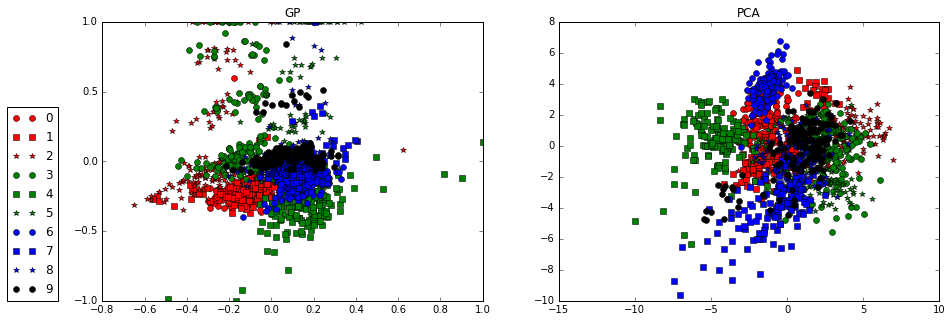

In [72]:
plt.clf()
plt.figure(figsize=(15, 5))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
plt.title('GP')

plt.subplot(1, 2, 2)
zeros = x_2d[labels == 0]
ones = x_2d[labels == 1]
twos = x_2d[labels == 2]
threes = x_2d[labels == 3]
fours = x_2d[labels == 4]
fives = x_2d[labels == 5]
sixes = x_2d[labels == 6]
sevens = x_2d[labels == 7]
eights = x_2d[labels == 8]
nines = x_2d[labels == 9]
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.title('PCA')
# plt.legend(loc=(-0.25, 0))

Let's look at the embedding learned by the neural net

In [4]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')

In [56]:
y_te = np.load('data_class/y_te.npy')
x_te = np.load('data_class/x_te.npy')
y_tr = np.load('data_class/y_tr.npy')
x_tr = np.load('data_class/x_tr.npy')

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
layer_1 = sigmoid(x_tr.dot(W1) + b1)
layer_2 = sigmoid(layer_1.dot(W2) + b2)
layer_3 = layer_2.dot(W3)
imgs = layer_3

scaler = StandardScaler()
imgs = scaler.fit_transform(imgs)
imgs /= 3

imgs[imgs < -1] = -1
imgs[imgs > 1] = 1


In [8]:
# labels = scaler_y.inverse_transform(y_tr).astype(int)
labels = y_tr

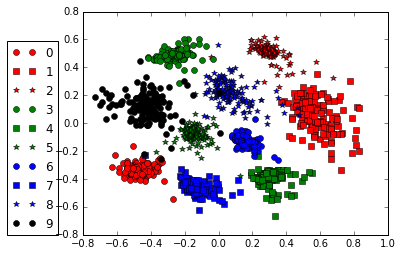

In [9]:
plt.clf()
plt.figure(figsize=(12, 4))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
# plt.title('GP-NN-class')
# plt.savefig('embedding.eps',bbox_inches='tight')

In [15]:
np.where(nines[:, 0]>=-0.1)

(array([ 6, 71]),)

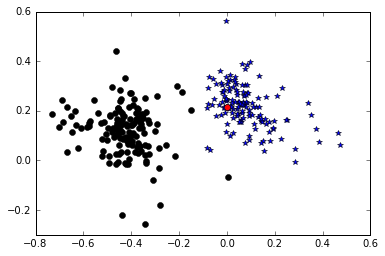

In [18]:
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[71, 0], nines[71, 1], 'ro', label='9')

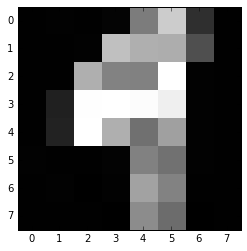

In [58]:
img = x_tr[labels==9][71, :]
img *= scaler_x.std_
img += scaler_x.mean_
plt.imshow(img.reshape(8, 8), cmap='gray', interpolation='Nearest')

### Test

In [59]:
layer_1 = sigmoid(x_te.dot(W1) + b1)
layer_2 = sigmoid(layer_1.dot(W2) + b2)
layer_3 = layer_2.dot(W3)
imgs = layer_3

scaler = StandardScaler()
imgs = scaler.fit_transform(imgs)
imgs /= 3

imgs[imgs < -1] = -1
imgs[imgs > 1] = 1

labels = y_te

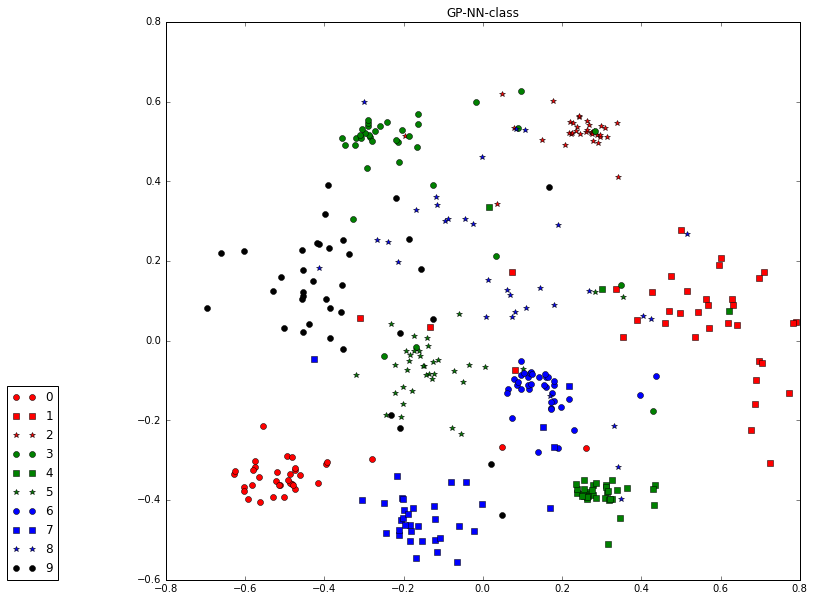

In [60]:
plt.clf()
plt.figure(figsize=(25, 10))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
plt.title('GP-NN-class')

## Autoencoder

In [61]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [146]:
encoding_dim = 2
input_img = Input(shape=(64,))
# l1 = Dense(50, activation='sigmoid')(input_img)
# l2 = Dense(50, activation='sigmoid')(l1)
# encoded = Dense(encoding_dim, activation='sigmoid')(l2)
# decode_l1 = Dense(50, activation='sigmoid')(encoded)
# decode_l2 = Dense(50, activation='sigmoid')(decode_l1)
# decoded = Dense(64, activation='sigmoid')(decode_l2)

# l1 = Dense(50, activation='sigmoid')(input_img)
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
# decode_l1 = Dense(50, activation='sigmoid')(encoded)
decoded = Dense(64, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [147]:
autoencoder.compile(optimizer='adam', loss='mse', lr=100.)
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 64)            0                                            
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 2)             130         input_9[0][0]                    
____________________________________________________________________________________________________
dense_28 (Dense)                 (None, 64)            192         dense_27[0][0]                   
Total params: 322
____________________________________________________________________________________________________


In [ ]:
autoencoder.fit(x_tr, x_tr,
                nb_epoch=1000,
                batch_size=50,
                shuffle=True,
                validation_data=(x_te, x_te))

Train on 1437 samples, validate on 360 samples
Epoch 1/1000
1437/1437 [==============================] - 0s - loss: 1.1959 - val_loss: 1.0538
Epoch 2/1000
1437/1437 [==============================] - 0s - loss: 1.1817 - val_loss: 1.0398
Epoch 3/1000
1437/1437 [==============================] - 0s - loss: 1.1681 - val_loss: 1.0262
Epoch 4/1000
1437/1437 [==============================] - 0s - loss: 1.1549 - val_loss: 1.0130
Epoch 5/1000
1437/1437 [==============================] - 0s - loss: 1.1421 - val_loss: 0.9999
Epoch 6/1000
1437/1437 [==============================] - 0s - loss: 1.1296 - val_loss: 0.9872
Epoch 7/1000
1437/1437 [==============================] - 0s - loss: 1.1176 - val_loss: 0.9749
Epoch 8/1000
1437/1437 [==============================] - 0s - loss: 1.1060 - val_loss: 0.9631
Epoch 9/1000
1437/1437 [==============================] - 0s - loss: 1.0948 - val_loss: 0.9518
Epoch 10/1000
1437/1437 [==============================] - 0s - loss: 1.0842 - val_loss: 0.9409
Ep

In [144]:
imgs = encoder.predict(x_tr)
labels = y_tr

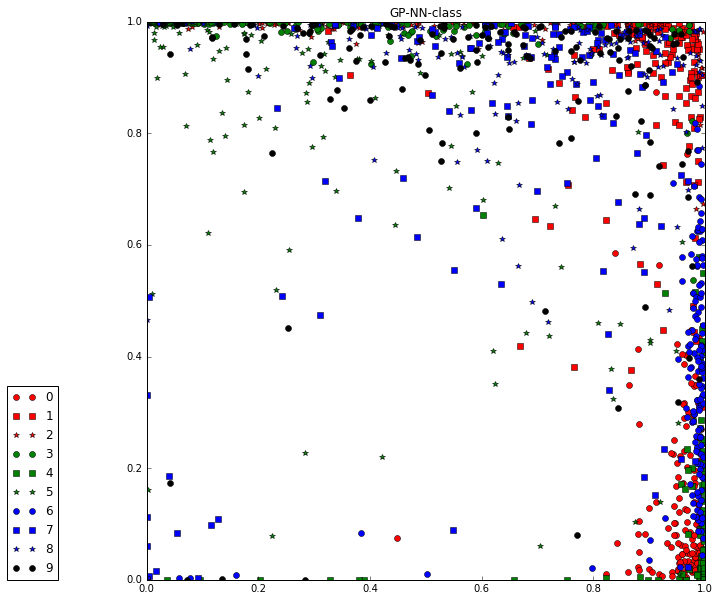

In [145]:
plt.clf()
plt.figure(figsize=(10, 10))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

# plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
plt.title('GP-NN-class')